## CZ2001 Algorithms Example Class 3
3B: Integration of Mergesort and Insertion Sort

In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

## MergeSort

In [2]:
class MergeSort:
    key_comp = 0
    
    # For running the algorithm to sort an array and print the result
    def run(self, arr):
        self.key_comp = 0
        start = time.perf_counter()
        sorted_arr = arr.copy()
        self.merge_sort_kc(sorted_arr, 0, len(sorted_arr) - 1)
        end = time.perf_counter()

        print("\nYour sorted array is: " + str(sorted_arr))
        print("It took you " + str((end-start)*100) + " * 10^-2 seconds to complete the sort")
        print("No. Key Comparisons: " + str(self.key_comp))
    
    # Get the run time of the algorithm to sort the given array
    def run_time(self, arr):
        sorted_arr = arr.copy()
        
        start = time.perf_counter()
        self.merge_sort(sorted_arr, 0, len(sorted_arr) - 1)
        end = time.perf_counter()
        
        del sorted_arr
        return end-start
    
    # Get the number of key comparisons made by the algorithm to sort the given array
    def run_keycomp(self, arr):
        self.key_comp = 0
        sorted_arr = arr.copy()
        
        self.merge_sort_kc(sorted_arr, 0, len(sorted_arr) - 1)

        del sorted_arr
        return self.key_comp
    
###########################################################################
#### Merge Sort
    
    # Merge Sort algorithm
    def merge_sort(self, arr, first, last):        
        # Base case
        if last - first <= 0:
            return
        
        mid = (int)((first+last)/2)
        if last - first > 1:    # 2 elements or more
            self.merge_sort(arr, first, mid)    # sort first half
            self.merge_sort(arr, mid+1, last)   # sort second half
        self.merge(arr, first, mid, last)   # merge two halves

    # Merge function
    def merge(self, arr, first, mid, last):
        a = first
        b = mid + 1
        while a <= mid and b <= last:
            if arr[a] < arr[b]:
                a += 1
            elif arr[b] < arr[a]:
                temp = arr[b]
                arr.pop(b)
                arr.insert(a, temp)    # insert at where a is
                a += 1
                mid += 1
                b += 1
            else:
                temp = arr[b]
                arr.pop(b)
                arr.insert(a, temp)    # insert at where a is
                a += 2
                mid += 1
                b += 1
                
###########################################################################
#### Merge Sort w/ Key Comparions Count
                
    # Merge Sort algorithm with key comparisons count
    def merge_sort_kc(self, arr, first, last):        
        # Base case
        if last - first <= 0:
            return
        
        mid = (int)((first+last)/2)
        if last - first > 1:    # 2 elements or more
            self.merge_sort_kc(arr, first, mid)    # sort first half
            self.merge_sort_kc(arr, mid+1, last)   # sort second half
        self.merge_kc(arr, first, mid, last)   # merge two halves

    # Merge function with key comparisons count
    def merge_kc(self, arr, first, mid, last):
        a = first
        b = mid + 1
        while a <= mid and b <= last:
            self.key_comp += 1    # 1 key comparison
            if arr[a] < arr[b]:
                a += 1
            elif arr[b] < arr[a]:
                temp = arr[b]
                arr.pop(b)
                arr.insert(a, temp)    # insert at where a is
                a += 1
                mid += 1
                b += 1
            else:
                temp = arr[b]
                arr.pop(b)
                arr.insert(a, temp)    # insert at where a is
                a += 2
                mid += 1
                b += 1

## Modified MergeSort (extends MergeSort)

In [3]:
class ModifiedMergeSort(MergeSort):
    
    def __init__(self, S):
        self.S_val = S
        
    def set_S(self, S):
        self.S_val = S
        
###########################################################################
#### Merge Sort
        
    # Override Merge Sort algorithm
    def merge_sort(self, arr, first, last):        
        # Base case
        if last - first <= 0:
            return
        
        # If the size of the array is less than or equal to S, carry out insertion sort
        if last - first < self.S_val:
            self.insertion_sort(arr, first, last)
        else:
            mid = (int)((first+last)/2)
            self.merge_sort(arr, first, mid)    # sort first half
            self.merge_sort(arr, mid+1, last)   # sort second half
            self.merge(arr, first, mid, last)   # merge two halves
        
    # Switch to insertion sort when array size is below S
    def insertion_sort(self, arr, first, last):
        for i in range(first+1, last+1):
            for j in range(i, first, -1):
                if arr[j] < arr[j-1]:
                    temp = arr[j]
                    arr[j] = arr[j-1]
                    arr[j-1] = temp
                else:
                    break
                    
###########################################################################
#### Merge Sort w/ Key Comparions Count
                    
    # Override Merge Sort algorithm with key comparisons
    def merge_sort_kc(self, arr, first, last):        
        # Base case
        if last - first <= 0:
            return
        
        # If the size of the array is less than or equal to S, carry out insertion sort
        if last - first < self.S_val:
            self.insertion_sort_kc(arr, first, last)
        else:
            mid = (int)((first+last)/2)
            self.merge_sort_kc(arr, first, mid)    # sort first half
            self.merge_sort_kc(arr, mid+1, last)   # sort second half
            self.merge_kc(arr, first, mid, last)   # merge two halves
        
    # Insertion sort when array size is below S, with key comparisons count
    def insertion_sort_kc(self, arr, first, last):
        for i in range(first+1, last+1):
            for j in range(i, first, -1):
                self.key_comp += 1    # 1 key comparison
                if arr[j] < arr[j-1]:
                    temp = arr[j]
                    arr[j] = arr[j-1]
                    arr[j-1] = temp
                else:
                    break

## Helper Methods to Create Array
Ways of creating array:
- User input
- n number of random integers
- n number of integers in decreasing order
- n number of integers in worst case order for merge sort

In [4]:
def populate_array_input():
    arr = []
    while True:
        val = input("Enter a number, type a non-number to quit: ")
        try:
            val = int(val)
        except ValueError:
            break
        arr.append(val)
    return arr


def populate_array_random(arr_length):
    arr = []
    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    return arr


def populate_array_decreasing(arr_length):

    arr = []
    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    arr.sort(reverse=True)
    return arr


# function to arrange array into worst case
# array must already be sorted in ascending order
def worstMergeSort(sorted_arr):
    # Base case
    if len(sorted_arr) <= 1:
        return sorted_arr

    # Partition left array with all the terms with even index
    left_arr = []
    for i in range(0, len(sorted_arr), 2):
        left_arr.append(sorted_arr[i])

    # Partition right array with all the terms with odd index
    right_arr = []
    for i in range(1, len(sorted_arr), 2):
        right_arr.append(sorted_arr[i])

    # Recursively divide the arrays into 2 until the base case for i in range(int(arr_length)):
    left_arr = worstMergeSort(left_arr)
    right_arr = worstMergeSort(right_arr)
    return left_arr + right_arr


def populate_array_worst(arr_length):
    arr = []
    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    arr.sort()
    worst_arr = worstMergeSort(arr)
    return worst_arr

## Run MergeSort

In [ ]:
mSort = MergeSort()
arr = populate_array_input()
print(arr)
mSort.run(arr)

In [ ]:
mSort = ModifiedMergeSort(5)
arr = populate_array_input()
print(arr)
mSort.run(arr)

In [ ]:
mSort = MergeSort()
arr = populate_array_random(23)
print(arr)
mSort.run(arr)

In [ ]:
mmSort = ModifiedMergeSort(5)
arr = populate_array_random(23)
print(arr)
mmSort.run(arr)

In [ ]:
mmSort.set_S(3)
arr =populate_array_random(23)
print(arr)
mmSort.run(arr)

In [ ]:
arr = populate_array_decreasing(23)
print(arr)
mmSort.run(arr)

In [ ]:
mmSort = ModifiedMergeSort(5)
arr = populate_array_random(23)
print(arr)
kc_count = mmSort.run_keycomp(arr)
print("No. Key Comparisons: " + str(kc_count))

# Get runtimes for different values of S and n

In [14]:
def iterate_sort_random_time(arr_length):
    # generate a random array of size n
    time_taken_list = []
    arr = populate_array_random(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_worst_time(arr_length):
    # generate a random array of size n
    time_taken_list = []
    arr = populate_array_worst(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_random_keycomp(arr_length):
    # generate a random array of size n
    keycomp_list = []
    arr = populate_array_random(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        keycomp = mms.run_keycomp(arr)
        keycomp_list.append(keycomp)
    return keycomp_list

def iterate_sort_worst_keycomp(arr_length):
    # generate a random array of size n
    keycomp_list = []
    arr = populate_array_worst(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        keycomp = mms.run_keycomp(arr)
        keycomp_list.append(keycomp)
    return keycomp_list

Enter the value of n:
70
     S  average case  worst case
0    0      0.000386    0.000193
1    1      0.000207    0.000200
2    2      0.000202    0.000205
3    3      0.000191    0.000208
4    4      0.000169    0.000243
..  ..           ...         ...
66  66      0.000325    0.000291
67  67      0.000324    0.000264
68  68      0.000319    0.000272
69  69      0.000319    0.000264
70  70      0.000439    0.000436

[71 rows x 3 columns] 

     S  average case  worst case
11  11      0.000144    0.000209
     S  average case  worst case
12  12      0.000145    0.000161


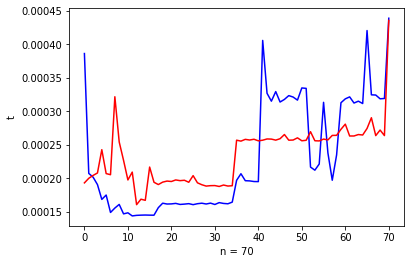

In [12]:
n = int(input("Enter the value of n:\n"))
average_runtime = iterate_sort_random_time(n)
worst_runtime = iterate_sort_worst_time(n)


df = pd.DataFrame({"S": range(0, n+1), "average case": average_runtime, "worst case": worst_runtime})
print(df,"\n")

#to find row with the fastest time
print(df.loc[df["average case"] == df["average case"].min()])
print(df.loc[df["worst case"] == df["worst case"].min()])

#plot average case in blue and worst case in red in increasing S for n
plt.plot(df["S"], df["average case"], 'b', df["S"], df["worst case"], 'r')
plt.ylabel('t')
plt.xlabel('n = '+ str(n))
plt.show()


### Based on keycomp instead of time

In [15]:
for n in range(0,101,10):
    average_keycomp = iterate_sort_random_keycomp(n)
    worst_keycomp = iterate_sort_worst_keycomp(n)

    df = pd.DataFrame({"S": range(0, n + 1), "average case": average_keycomp, "worst case": worst_keycomp})
    print("n = ", n)
    print(df.loc[df["average case"] == df["average case"].min()])
    print(df.loc[df["worst case"] == df["worst case"].min()])
print(df)

n =  0
   S  average case  worst case
0  0             0           0
   S  average case  worst case
0  0             0           0
n =  10
     S  average case  worst case
0    0             0          25
1    1             0          25
2    2             0          25
3    3             0          25
4    4             0          25
5    5             0          25
6    6             0          25
7    7             0          25
8    8             0          25
9    9             0          25
10  10             0          27
   S  average case  worst case
0  0             0          25
1  1             0          25
2  2             0          25
3  3             0          25
4  4             0          25
5  5             0          25
6  6             0          25
7  7             0          25
8  8             0          25
9  9             0          25
n =  20
     S  average case  worst case
0    0             0          69
1    1             0          69
2    2           